---
title: "Likelihood Ratio Test, Regression and Gradient Descent"
format:
    html:
        toc: true
---

## Likelihood Ratio Test

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

The file gamma-ray.csv contains a small quantity of data collected from the Compton Gamma Ray Observatory, a satellite launched by NASA in 1991 (http://cossc.gsfc.nasa.gov/). For each of 100 sequential time intervals of variable lengths (given in seconds), the number of gamma rays originating in a particular area of the sky was recorded. 

For this analysis, we would like to check the assumption that the emission rate is constant.

First, let's check the distribution of the number of gamma rays

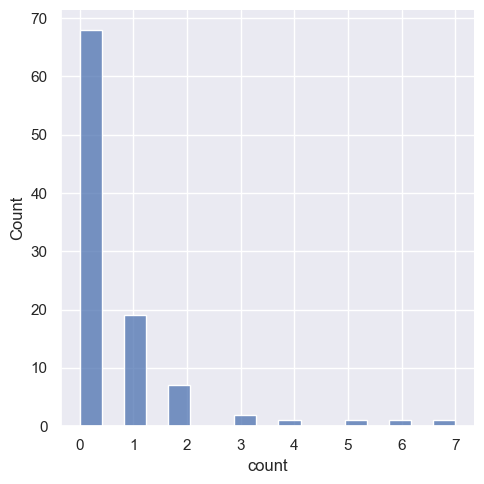

In [6]:
df = pd.read_csv("gamma-ray.csv", sep=",")

sns.set_theme(style="darkgrid")
sns.displot(df,x="count")

The number of these gamma rays is discrete and non-negative. We can assume that the gamma rays emerge independently of one another, and at constant rate in each time interval.
Based on this assumption, a Poisson model is a good model assumption. Each observation $G_i$ follows a poisson distribution with rate $\lambda_i$ times the time interval $t_i$.

$$G_i \thicksim Poisson(\lambda_i * t_i)$$

THe hypothesis that we wanna test is that the emission rate is constat so:

$H_0: \lambda_0 = \lambda_1 = ... = \lambda_{99}$

And the alternative hypothesis is that the emisison rates are different:

$H_A: \lambda_i \neq \lambda_j$ for some i and j

The most plausible parameter for $\lambda$ under the null hypothesis is the maximun likelihood estimator (MLE).

Given the poisson distribution, the derivation goes as follows:

$$f(G_0,G_1,...,G_{99} | \lambda) = \prod_{i=0}^{99} \frac{e^{-\lambda*t_i}*(\lambda*t_i)^{G_i}}{G_i!}$$

$$ln(f) = -\lambda \sum_{i=0}^{99} t_i + ln(\lambda) \sum_{i=0}^{99} G_i + ln(\prod_{i=0}^{99} t_i^{G_i})) - ln(\prod_{i=0}^{99} G_i!)$$

Then, we derivate w.r.t parameter $\lambda$ and set the derivative to 0 to find the optimal $\lambda$.

$$0 = -\sum_{i=0}^{99}t_i + \sum_{i=0}^{99} \frac{G_i}{\lambda}$$

$$\hat{\lambda} = \frac{\sum_{i=0}^{99} G_i}{\sum_{i=0}^{99} t_i}$$

In [10]:
lambda_null = df["count"].sum() / df["seconds"].sum()

lambda_null

0.0038808514969907496

Similarly, we can calculate a plausible value for the alternative hypothesis with MLE.

$$ln(f) = -\sum_{i=0}^{99} \lambda_i*t_i + \sum_{i=0}^{99} G_i*ln(\lambda_i) + ln(\prod_{i=0}^{99} G_i*ln(t_i)) - ln(\prod_{i=0}^{99} G_i!)$$

WE take the partial derivative w.r.t each parameter $\lambda_i$ to find the optimal $\lambda_i$

$$0 = -t_i + \frac{G_i}{\lambda_i}$$

$$\hat{\lambda_i} = \frac{G_i}{t_i}$$

In [11]:
lambdas_alt = df["count"]/df["seconds"]

lambdas_alt

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.009804
        ...   
95    0.025840
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64

Now to test these hypotheses, we are gonna use the likelihood ratio test:

$$\Lambda(x) = -2ln(\frac{argmax f(G_0,G_1,...,G_{99}| \lambda)}{argmax f(G_0,G_1,...,G_{99}| \lambda_0,...,\lambda_{99})})$$

which asymptotic distribution $X_{100-1 = 99}^{2}$

In [17]:
lh_null = sc.stats.poisson.pmf(k=df["count"], mu=lambda_null)

lh_alt = sc.stats.poisson.pmf(k=df["count"], mu=lambdas_alt)

llh_test = -2*np.log(lh_null.prod() / lh_alt.prod())

llh_test

104.33272117042188

We can see the distribution of the chi-squared pdf at 99 degrees of freedom

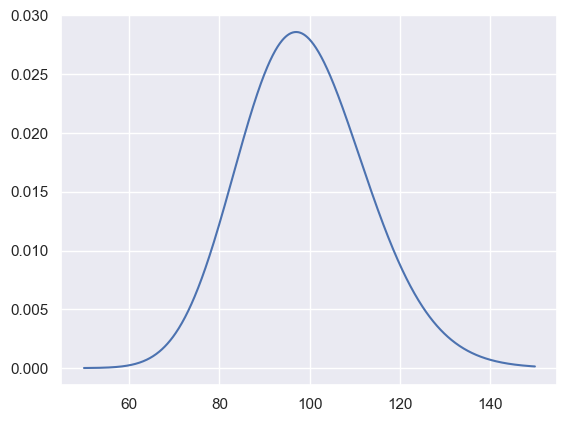

In [20]:
plot_Xs = np.arange(50,150,0.1)
plt.plot(plot_Xs, sc.stats.chi2.pdf(plot_Xs, 99))
plt.show()

And see the value that give a p-value of 0.05

In [21]:
# We can calculate the Lambda that would give a p-value of 0.05 by using the inverse survival function
sc.stats.chi2.isf(0.05, 99)

123.22522145336181

Calculating our p-value:

In [22]:
pvalue = sc.stats.chi2.sf(llh_test, 99)
print(pvalue)

0.337398546433923


We can conclude that we cannot reject our null hypothesis, emission rate of gamma rays appear to be constant.